# Лабораторная №2
### Набор данных -- "Пригодность воды для питья"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict

### Чтение данных из файла

In [2]:
data = pd.read_csv('data.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### Подсчёт пропущенных значений в каждом столбце

In [3]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Удаление строк с пропущенными значениями

In [4]:
data = data.dropna()
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


### Разделение на признаки и целевую переменную

In [5]:
# признаки -- все столбцы, кроме 'Potability'
x = data.drop('Potability', axis=1)
# целевая переменная -- столбец 'Potability'
y = data['Potability'].values

### Разделение на обучающий и тестовый наборы

In [6]:
# 20% данных выделяется на тестирование
# random_state=42 -- нач. значение для генератора случайных чисел (чтобы можно было повторить р-ты)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Выбор лучшего метода
### Метод 1: Логистическая регрессия

In [7]:
# создание модели классификатора 
lr = LogisticRegression(max_iter=6300)

# обучение модели (выполняем кросс-валидацию модели на обучающем наборе данных)
# cv=5 -- кол-во фолдов (частей), на которые будет разделено обучающее мн-во для кросс-валидации
lr_predictions = cross_val_predict(lr, X_train, Y_train, cv=5)

# вычисление метрик качества
# F-мера
lr_f1 = f1_score(Y_train, lr_predictions)
# ROC AUC
lr_roc_auc = roc_auc_score(Y_train, lr_predictions)
# Accuracy
lr_accuracy = accuracy_score(Y_train, lr_predictions)

# построение матрицы ошибок
lr_conf_matrix = confusion_matrix(Y_train, lr_predictions)

print(f"F-мера: {lr_f1}")
print(f"ROC AUC: {lr_roc_auc}")
print(f"Accuracy: {lr_accuracy}")
print(f"Матрица ошибок:\n{lr_conf_matrix}")

F-мера: 0.03945371775417299
ROC AUC: 0.5065601728707297
Accuracy: 0.6063432835820896
Матрица ошибок:
[[962   7]
 [626  13]]


### Метод 2: Метод опорных векторов (SVM)

In [8]:
# создание модели классификатора 
svm = SVC()

# обучение модели
svm_predictions = cross_val_predict(svm, X_train, Y_train, cv=5)

# вычисление метрик качества
# F-мера
svm_f1 = f1_score(Y_train, svm_predictions)
# ROC AUC
svm_roc_auc = roc_auc_score(Y_train, svm_predictions)
# Accuracy
svm_accuracy = accuracy_score(Y_train, svm_predictions)

# построение матрицы ошибок
svm_conf_matrix = confusion_matrix(Y_train, svm_predictions)

print(f"F-мера: {svm_f1}")
print(f"ROC AUC: {svm_roc_auc}")
print(f"Accuracy: {svm_accuracy}")
print(f"Матрица ошибок:\n{svm_conf_matrix}")

F-мера: 0.0
ROC AUC: 0.5
Accuracy: 0.6026119402985075
Матрица ошибок:
[[969   0]
 [639   0]]


### Метод 3: k-ближайших соседей

In [9]:
# создание модели классификатора 
# algorithm='auto' -- автоматический выбор подходящего алгоритма на основе данных
# n_jobs=-1 -- для выполнения классификации используются все доступные ядра процессора 
knn = KNeighborsClassifier(algorithm='auto', n_jobs=-1)

# обучение модели
knn_predictions = cross_val_predict(knn, X_train, Y_train, cv=5)

# вычисление метрик качества
# F-мера
knn_f1 = f1_score(Y_train, knn_predictions)
# ROC AUC
knn_roc_auc = roc_auc_score(Y_train, knn_predictions)
# Accuracy
knn_accuracy = accuracy_score(Y_train, knn_predictions)

# построение матрицы ошибок
knn_conf_matrix = confusion_matrix(Y_train, knn_predictions)

print(f"F-мера: {knn_f1}")
print(f"ROC AUC: {knn_roc_auc}")
print(f"Accuracy: {knn_accuracy}")
print(f"Матрица ошибок:\n{knn_conf_matrix}")

F-мера: 0.37630662020905925
ROC AUC: 0.5178272940013663
Accuracy: 0.554726368159204
Матрица ошибок:
[[676 293]
 [423 216]]


### Метод 4: Деревья принятия решений

In [10]:
# создание модели классификатора 
dt = DecisionTreeClassifier()

# обучение модели
dt_predictions = cross_val_predict(dt, X_train, Y_train, cv=5)

# вычисление метрик качества
# F-мера
dt_f1 = f1_score(Y_train, dt_predictions)
# ROC AUC
dt_roc_auc = roc_auc_score(Y_train, dt_predictions)
# Accuracy
dt_accuracy = accuracy_score(Y_train, dt_predictions)

# построение матрицы ошибок
dt_conf_matrix = confusion_matrix(Y_train, dt_predictions)

print(f"F-мера: {dt_f1}")
print(f"ROC AUC: {dt_roc_auc}")
print(f"Accuracy: {dt_accuracy}")
print(f"Матрица ошибок:\n{dt_conf_matrix}")

F-мера: 0.5038639876352395
ROC AUC: 0.5853234300886156
Accuracy: 0.6007462686567164
Матрица ошибок:
[[640 329]
 [313 326]]


### Метод 5: Случайный лес

In [11]:
# создание модели классификатора 
rf = RandomForestClassifier()

# обучение модели
rf_predictions = cross_val_predict(rf, X_train, Y_train, cv=5)

# вычисление метрик качества
# F-мера
rf_f1 = f1_score(Y_train, rf_predictions)
# ROC AUC
rf_roc_auc = roc_auc_score(Y_train, rf_predictions)
# Accuracy
rf_accuracy = accuracy_score(Y_train, rf_predictions)

# построение матрицы ошибок
rf_conf_matrix = confusion_matrix(Y_train, rf_predictions)

print(f"F-мера: {rf_f1}")
print(f"ROC AUC: {rf_roc_auc}")
print(f"Accuracy: {rf_accuracy}")
print(f"Матрица ошибок:\n{rf_conf_matrix}")

F-мера: 0.4826216484607746
ROC AUC: 0.6256413610662945
Accuracy: 0.6759950248756219
Матрица ошибок:
[[844 125]
 [396 243]]


### Метод 6: Бустинг (Gradient Boosting)

In [12]:
# создание модели классификатора 
gb = GradientBoostingClassifier()

# обучение модели
gb_predictions = cross_val_predict(gb, X_train, Y_train, cv=5)

# вычисление метрик качества
# F-мера
gb_f1 = f1_score(Y_train, gb_predictions)
# ROC AUC
gb_roc_auc = roc_auc_score(Y_train, gb_predictions)
# Accuracy
gb_accuracy = accuracy_score(Y_train, gb_predictions)

# построение матрицы ошибок
gb_conf_matrix = confusion_matrix(Y_train, gb_predictions)

print(f"F-мера: {gb_f1}")
print(f"ROC AUC: {gb_roc_auc}")
print(f"Accuracy: {gb_accuracy}")
print(f"Матрица ошибок:\n{gb_conf_matrix}")

F-мера: 0.4305555555555556
ROC AUC: 0.5913651845714812
Accuracy: 0.6430348258706468
Матрица ошибок:
[[817 152]
 [422 217]]


### Выбор лучшего метода 

In [13]:
model_scores = [ 
    ("Логистическая регрессия", lr_predictions.mean()), 
    ("Метод опорных векторов", svm_predictions.mean()), 
    ("K-ближайших соседей", knn_predictions.mean()), 
    ("Деревья принятия решений", dt_predictions.mean()), 
    ("Случайный лес", rf_predictions.mean()), 
    ("Бустинг (Gradient Boosting)", gb_predictions.mean()) 
]

best_model = max(model_scores, key=lambda x: x[1])
sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=True)

for model in sorted_models: 
    print(f"{model[0]} -- {model[1]}")

best_model_name = best_model[0]

print(f"\nЛучший метод: {best_model_name}")

Деревья принятия решений -- 0.40733830845771146
K-ближайших соседей -- 0.31654228855721395
Бустинг (Gradient Boosting) -- 0.2294776119402985
Случайный лес -- 0.22885572139303484
Логистическая регрессия -- 0.012437810945273632
Метод опорных векторов -- 0.0

Лучший метод: Деревья принятия решений


### Обучение на всём обучающем наборе с помощью выбранного метода

In [14]:
if best_model_name == "Логистическая регрессия":
    chosen_model = LogisticRegression(max_iter=6300)
elif best_model_name == "Метод опорных векторов":
    chosen_model = SVC()
elif best_model_name == "K-ближайших соседей":
    chosen_model = KNeighborsClassifier(algorithm='auto', n_jobs=-1)
elif best_model_name == "Деревья принятия решений":
    chosen_model = DecisionTreeClassifier()
elif best_model_name == "Случайный лес":
    chosen_model = RandomForestClassifier()
else:
    chosen_model = GradientBoostingClassifier()
    
chosen_model.fit(X_train, Y_train)
predictions = chosen_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, predictions)

print(f"Лучшая модель -- {best_model_name}\n")

print("F-мера:", f1_score(Y_test, predictions))
print("ROC AUC:", roc_auc_score(Y_test, predictions))
print("Accuracy:", accuracy_score(Y_test, predictions))

print("Матрица ошибок:\n", conf_matrix)

Лучшая модель -- Деревья принятия решений

F-мера: 0.5636363636363636
ROC AUC: 0.6296561965166617
Accuracy: 0.6426799007444168
Матрица ошибок:
 [[166  65]
 [ 79  93]]


## Изменение точности при изменении гиперпараметров
### 1) Логистическая регрессия

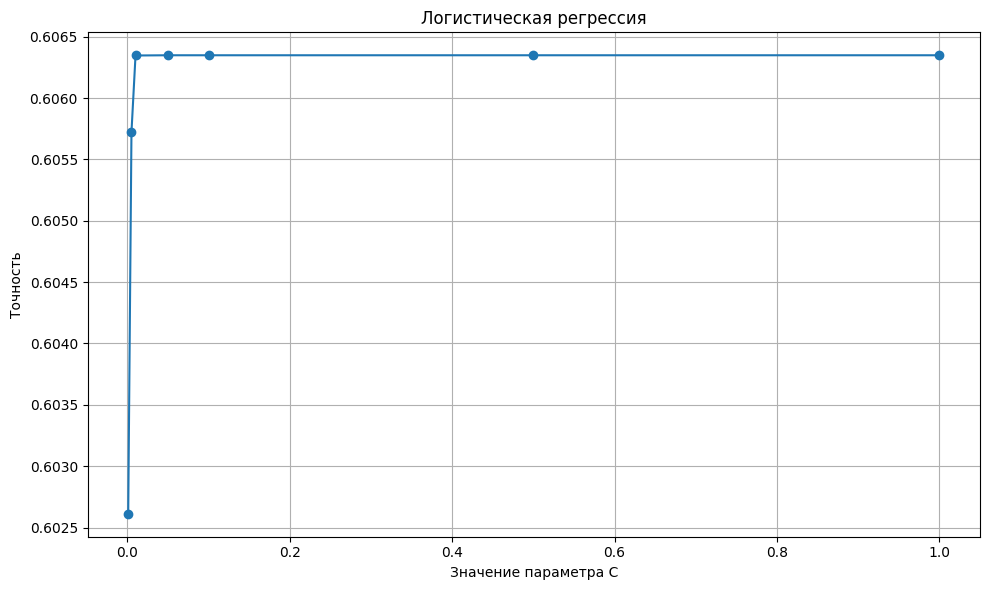

Оптимальный параметр C: 0.05
Точность: 0.6063485613668467


In [15]:
# lr_params = {'C': [0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5]}
lr_params = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}

lr = LogisticRegression(max_iter=7000)

# поиск оптимальных гиперпараметров (С) с использованием кросс-валидации
# lr -- модель
# lr_grid -- набор параметров, которые будут оптимизированы
# cv -- 5-кратная кросс-валидация
# 'accuracy' -- используемая метрика качества
# (создание объекта GridSearchCV для настройки параметров с помощью кросс-валидации) 
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')

# обучение модели на обучающих данных
lr_grid.fit(X_train, Y_train)

# Визуализация изменения точности при изменении параметра C
plt.figure(figsize=(10, 6))
plt.plot(lr_params['C'], lr_grid.cv_results_['mean_test_score'], marker='o')

plt.xlabel("Значение параметра C")
plt.ylabel("Точность")
plt.title("Логистическая регрессия")

# добавление сетки на график
plt.grid()
# улучшение компоновки графика (чтобы эл-ты друг на друга не накладывались)
plt.tight_layout()

plt.show()

# Вывод оптимального параметра C и его точности
print(f"Оптимальный параметр C: {lr_grid.best_params_['C']}")
print(f"Точность: {lr_grid.best_score_}")

### 2) Метод опорных векторов (SVM)

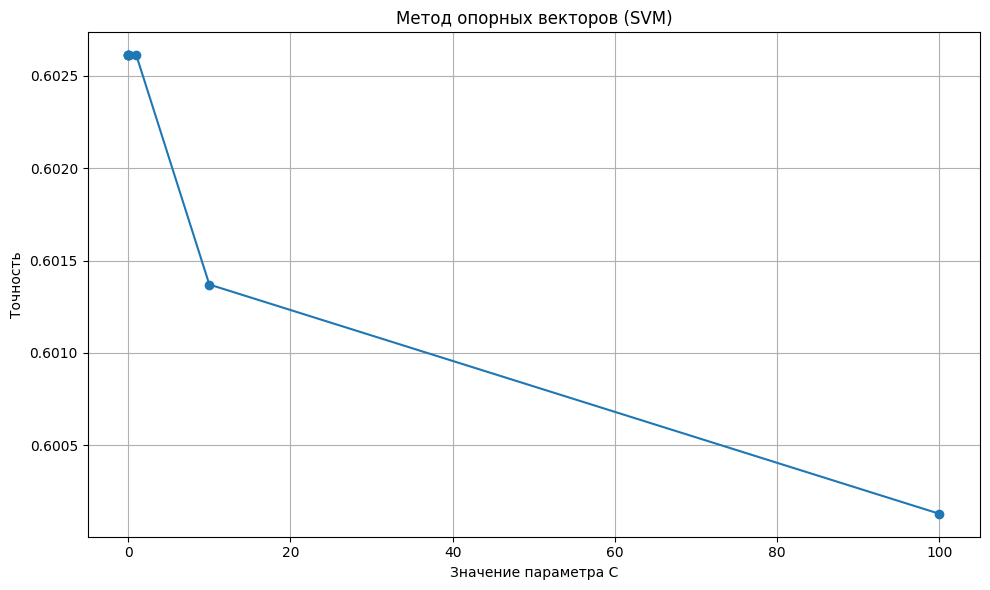

Оптимальный параметр C: 0.0001
Точность: 0.6026121785569164


In [16]:
# Гиперпараметры для Метода опорных векторов
svm_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Метод 2: Метод опорных векторов (SVM)
svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, Y_train)

# Визуализация изменения точности при изменении параметра C
plt.figure(figsize=(10, 6))
plt.plot(svm_params['C'], svm_grid.cv_results_['mean_test_score'], marker='o')

plt.xlabel("Значение параметра C")
plt.ylabel("Точность")
plt.title("Метод опорных векторов (SVM)")

plt.grid()
plt.tight_layout()

plt.show()

# Вывод оптимального параметра C и его точности
print(f"Оптимальный параметр C: {svm_grid.best_params_['C']}")
print(f"Точность: {svm_grid.best_score_}")

### 3) K-ближайших соседей

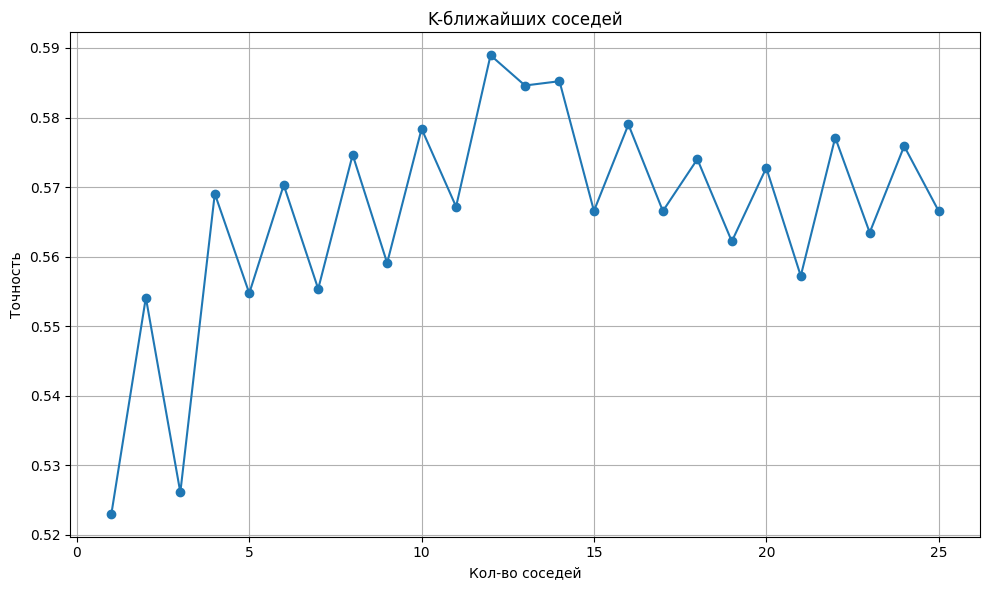

Оптимальное кол-во соседей: 12
Точность: 0.5889475822836245


In [17]:
# Гиперпараметры для K-ближайших соседей
knn_params = {'n_neighbors': range(1, 26)}

# Метод 3: K-ближайших соседей
knn = KNeighborsClassifier(algorithm='auto', n_jobs=-1)

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')

knn_grid.fit(X_train, Y_train)

# Визуализация изменения точности при изменении количества соседей
plt.figure(figsize=(10, 6))
plt.plot(knn_params['n_neighbors'], knn_grid.cv_results_['mean_test_score'], marker='o')

plt.xlabel("Кол-во соседей")
plt.ylabel("Точность")
plt.title("K-ближайших соседей")

plt.grid()
plt.tight_layout()

plt.show()

# Вывод оптимального количества соседей и его точности
print(f"Оптимальное кол-во соседей: {knn_grid.best_params_['n_neighbors']}")
print(f"Точность: {knn_grid.best_score_}")

### 4) Деревья принятия решений

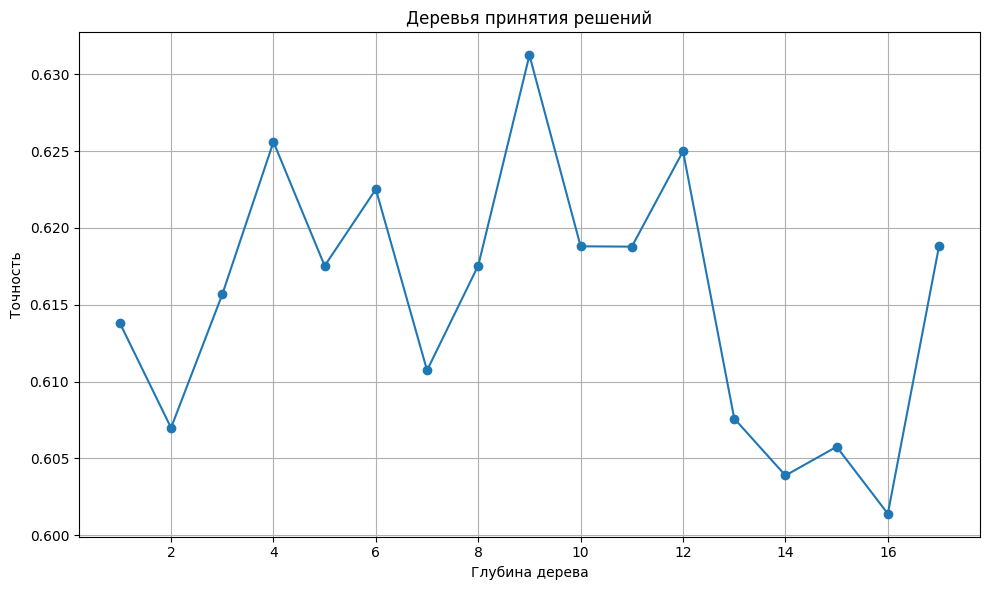

Оптимальная глубина дерева: 9
Точность: 0.6312455254348793


In [18]:
# Гиперпараметры для Деревьев принятия решений
dt_params = {'max_depth': range(1, 18)}

# Метод 4: Деревья принятия решений
dt = DecisionTreeClassifier()

dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')

dt_grid.fit(X_train, Y_train)

# Визуализация изменения точности при изменении глубины дерева
plt.figure(figsize=(10, 6))
plt.plot(dt_params['max_depth'], dt_grid.cv_results_['mean_test_score'], marker='o')

plt.xlabel("Глубина дерева")
plt.ylabel("Точность")
plt.title("Деревья принятия решений")

plt.grid()
plt.tight_layout()

plt.show()

# Вывод оптимальной глубины дерева и его точности
print(f"Оптимальная глубина дерева: {dt_grid.best_params_['max_depth']}")
print(f"Точность: {dt_grid.best_score_}")

### 5) Случайный лес

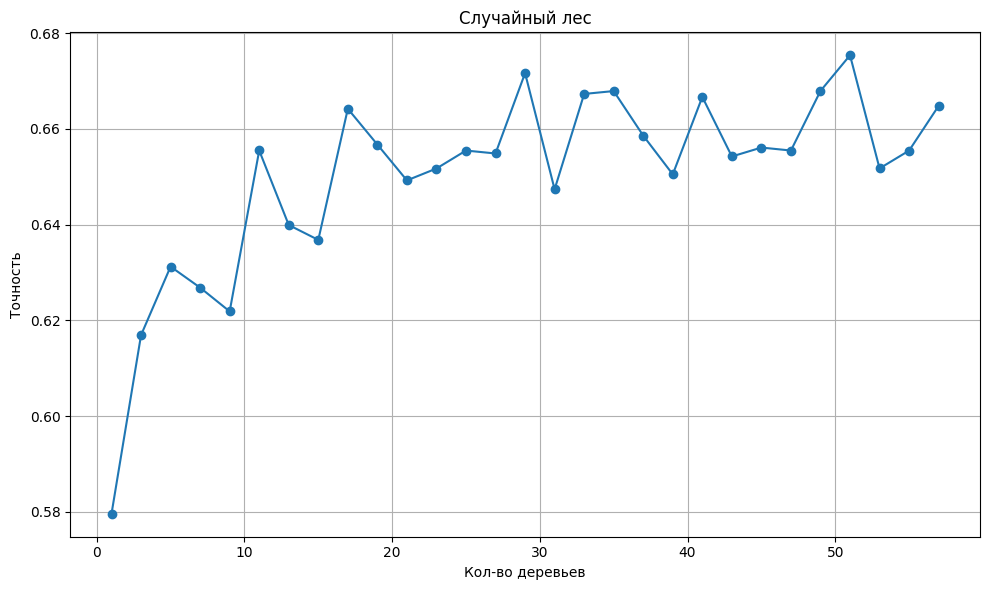

Оптимальное кол-во деревьев: 51
Точность: 0.6753681236818172


In [19]:
# Гиперпараметры для Случайного леса
rf_params = {'n_estimators': range(1, 58, 2)}

# Метод 5: Случайный лес
rf = RandomForestClassifier()

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')

rf_grid.fit(X_train, Y_train)

# Визуализация изменения точности при изменении количества деревьев
plt.figure(figsize=(10, 6))
plt.plot(rf_params['n_estimators'], rf_grid.cv_results_['mean_test_score'], marker='o')

plt.xlabel("Кол-во деревьев")
plt.ylabel("Точность")
plt.title("Случайный лес")

plt.grid()
plt.tight_layout()

plt.show()

# Вывод оптимального количества деревьев и его точности
print(f"Оптимальное кол-во деревьев: {rf_grid.best_params_['n_estimators']}")
print(f"Точность: {rf_grid.best_score_}")

### 6) Бустинг (Gradient Boosting) 

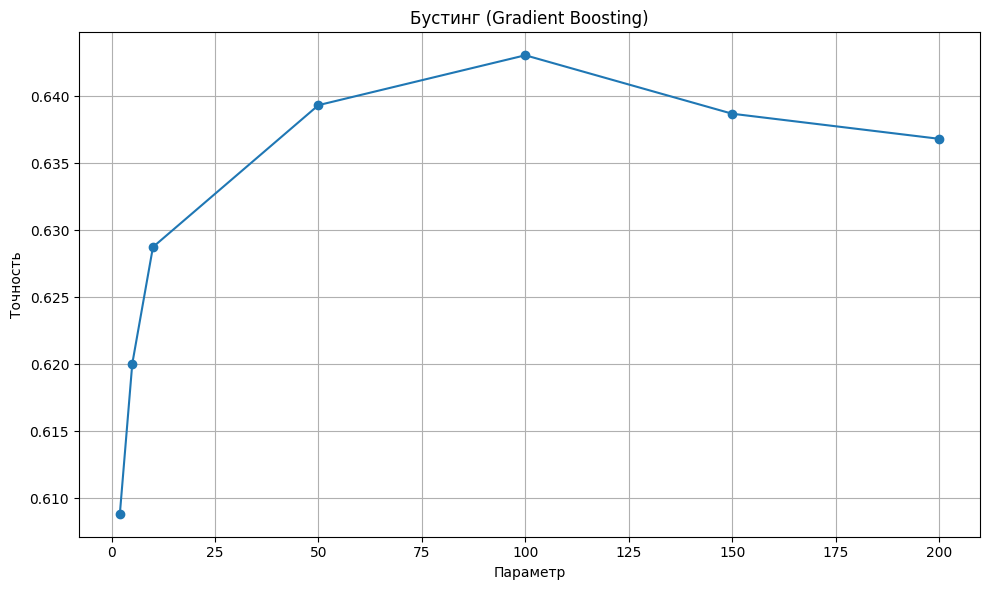

Оптимальный параметр бустинга: 100
Точность: 0.6430428977767458


In [20]:
# Гиперпараметры для Бустинга (Gradient Boosting)
gb_params = {'n_estimators': [2, 5, 10, 50, 100, 150, 200]}

# Метод 6: Бустинг (Gradient Boosting)
gb = GradientBoostingClassifier()

gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='accuracy')

gb_grid.fit(X_train, Y_train)

# Визуализация изменения точности при изменении параметров
plt.figure(figsize=(10, 6))
plt.plot(gb_params['n_estimators'], gb_grid.cv_results_['mean_test_score'], marker='o')

plt.xlabel("Параметр")
plt.ylabel("Точность")
plt.title("Бустинг (Gradient Boosting)")

plt.grid()
plt.tight_layout()

plt.show()

# Вывод оптимального параметра и его точности
print(f"Оптимальный параметр бустинга: {gb_grid.best_params_['n_estimators']}")
print(f"Точность: {gb_grid.best_score_}")

## Изменение точности по шагам кросс-валидации

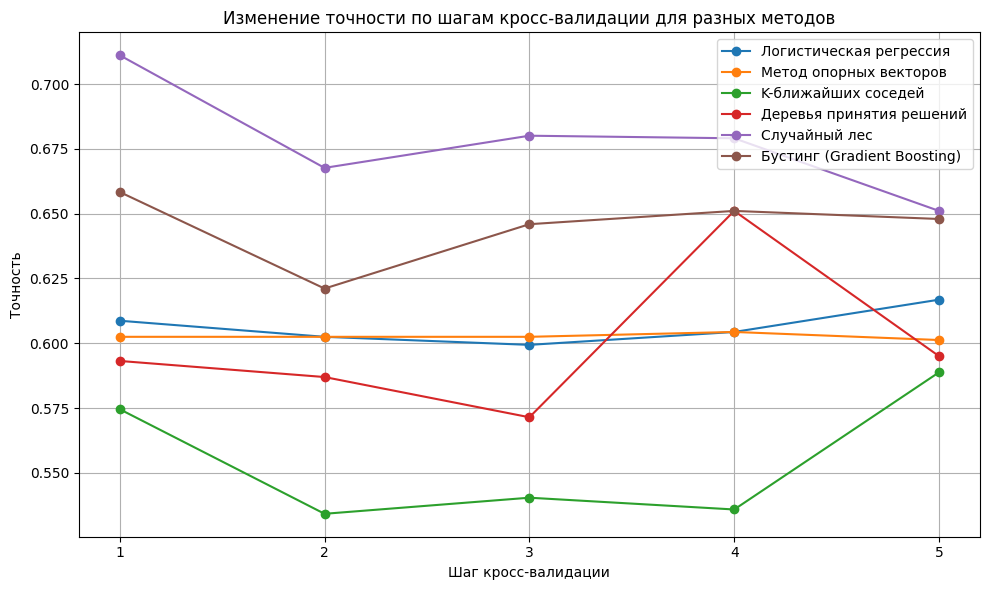

In [21]:
# вычисление score 5 раз подряд (с различными разделениями каждый раз)
# Метод 1: Логистическая регрессия
# создание модели логистической регрессии
lr = LogisticRegression(max_iter=6300)
# 5-кратная кросс-валидация для оценки точности модели на обучающем наборе данных 
lr_scores = cross_val_score(lr, X_train, Y_train, cv=5, scoring='accuracy')

# Метод 2: Метод опорных векторов (SVM)
svm = SVC()
svm_scores = cross_val_score(svm, X_train, Y_train, cv=5, scoring='accuracy')

# Метод 3: K-ближайших соседей
knn = KNeighborsClassifier(algorithm='auto', n_jobs=-1)
knn_scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')

# Метод 4: Деревья принятия решений
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train, Y_train, cv=5, scoring='accuracy')

# Метод 5: Случайный лес
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring='accuracy')

# Метод 6: Бустинг (Gradient Boosting)
gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X_train, Y_train, cv=5, scoring='accuracy')

# Визуализация изменения точности по шагам кросс-валидации для каждого метода
# задание размера фигуры 10*6 дюймов
plt.figure(figsize=(10, 6))

# построение соответствующих графиков
plt.plot(np.arange(1, 6), lr_scores, marker='o', label='Логистическая регрессия')
plt.plot(np.arange(1, 6), svm_scores, marker='o', label='Метод опорных векторов')
plt.plot(np.arange(1, 6), knn_scores, marker='o', label='K-ближайших соседей')
plt.plot(np.arange(1, 6), dt_scores, marker='o', label='Деревья принятия решений')
plt.plot(np.arange(1, 6), rf_scores, marker='o', label='Случайный лес')
plt.plot(np.arange(1, 6), gb_scores, marker='o', label='Бустинг (Gradient Boosting)')

plt.xlabel("Шаг кросс-валидации")
plt.ylabel("Точность")
plt.title("Изменение точности по шагам кросс-валидации для разных методов")

# установка меток на оси Ох
plt.xticks(np.arange(1, 6))

# добавление легенды в график
plt.legend()
# добавление сетки на график
plt.grid()
# улучшение компоновки графика
plt.tight_layout()

plt.show()

## Средняя точность с указанием стандартного отклонения

In [22]:
model_scores = [ 
    ("Логистическая регрессия", lr_scores.mean(), lr_scores.std()), 
    ("Метод опорных векторов", svm_scores.mean(), svm_scores.std()), 
    ("K-ближайших соседей", knn_scores.mean(), knn_scores.std()), 
    ("Деревья принятия решений", dt_scores.mean(), dt_scores.std()), 
    ("Случайный лес", rf_scores.mean(), rf_scores.std()), 
    ("Бустинг (Gradient Boosting)", gb_scores.mean(), gb_scores.std()) 
]

best_model = max(model_scores, key=lambda x: x[1])
sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=True)

for model in sorted_models: 
    print(f"{model[0]} -- {model[1]:.5f} (+/- {model[2]:.5f})")

best_model_name = best_model[0]

print(f"\nЛучший метод: {best_model_name}")

Случайный лес -- 0.67784 (+/- 0.01968)
Бустинг (Gradient Boosting) -- 0.64491 (+/- 0.01262)
Логистическая регрессия -- 0.60635 (+/- 0.00604)
Метод опорных векторов -- 0.60261 (+/- 0.00100)
Деревья принятия решений -- 0.59953 (+/- 0.02708)
K-ближайших соседей -- 0.55474 (+/- 0.02253)

Лучший метод: Случайный лес
